In [677]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import scorecardpy as sc
import pprint

In [678]:
df_main = pd.read_csv('filtered_data_iter2.csv')
df = df_main.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114755 entries, 0 to 114754
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                114755 non-null  int64  
 1   STATUS                    114755 non-null  int64  
 2   NAME_CONTRACT_TYPE        114755 non-null  object 
 3   FLAG_OWN_CAR              114755 non-null  object 
 4   FLAG_OWN_REALTY           114755 non-null  object 
 5   AMT_INCOME_TOTAL          114755 non-null  float64
 6   AMT_CREDIT                114755 non-null  float64
 7   AMT_ANNUITY               114755 non-null  float64
 8   NAME_INCOME_TYPE          114755 non-null  object 
 9   NAME_EDUCATION_TYPE       114755 non-null  object 
 10  NAME_FAMILY_STATUS        114755 non-null  object 
 11  NAME_HOUSING_TYPE         114755 non-null  object 
 12  DAYS_EMPLOYED             114755 non-null  int64  
 13  OCCUPATION_TYPE           114755 non-null  o

In [679]:
#replace value 0 in status with 2
df["STATUS"].replace(0,2,inplace=True)
df["STATUS"].replace(1,0,inplace=True)
df["STATUS"].replace(2,1,inplace=True)
df["STATUS"].value_counts()


1    104221
0     10534
Name: STATUS, dtype: int64

In [680]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                  0
STATUS                      0
NAME_CONTRACT_TYPE          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
EXT_SOURCE_2                0
DEF_60_CNT_SOCIAL_CIRCLE    0
age                         0
total_enquiries_cb          0
credit_income_ratio         0
dtype: int64

In [681]:
data_dict = {}
for col in df.columns:
    data_dict[col] = [str(df[col].dtypes)]
    

In [682]:
object_list = []
for key, value in data_dict.items():
    if value == ['object']:
        object_list.append(key)
object_list.append('STATUS')
object_list

#label encode all object columns
for col in object_list:
    df[col] = LabelEncoder().fit_transform(df[col])

In [683]:
df.head()

,Unnamed: 0,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age,total_enquiries_cb,credit_income_ratio
0,0,1,0,1,1,171000.0,1560726.0,41301.0,1,1,1,1,-3130,0,3.0,0.724000,0.0,37.0,4.0,9.127053
1,2,1,0,0,1,112500.0,652500.0,21177.0,5,1,1,1,-679,3,3.0,0.651862,0.0,27.0,1.0,5.800000
2,3,1,0,0,1,67500.0,80865.0,5881.5,5,4,1,1,-2717,8,2.0,0.715042,0.0,36.0,1.0,1.198000
3,4,1,0,1,0,225000.0,918468.0,28966.5,5,4,1,1,-3028,4,3.0,0.566907,0.0,38.0,1.0,4.082080
4,6,1,0,0,0,108000.0,509602.5,26149.5,5,4,1,1,-1317,4,2.0,0.236378,0.0,35.0,1.0,4.718542


In [684]:
del df['Unnamed: 0']

In [685]:
# automatically calculate bin ranges
bins = sc.woebin(df, y='STATUS',positive="bad|0")
# bins = sc.woebin(df, y='STATUS')
# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
Binning on 114564 rows and 19 columns in 00:00:15
AMT_ANNUITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY,"[-inf,14000.0)",19409,0.169416,17979,1430,0.073677,-0.239052,8.782527e-03,0.032036,14000.0,False
1,AMT_ANNUITY,"[14000.0,36000.0)",67860,0.592333,60889,6971,0.102726,0.125184,9.769004e-03,0.032036,36000.0,False
2,AMT_ANNUITY,"[36000.0,42000.0)",10646,0.092926,9668,978,0.091865,0.001411,1.851115e-07,0.032036,42000.0,False
3,AMT_ANNUITY,"[42000.0,inf)",16649,0.145325,15517,1132,0.067992,-0.325472,1.348406e-02,0.032036,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,"[-inf,1.0)",12185,0.106360,10877,1308,0.107345,0.174327,0.003470,0.009239,1.0,False
1,NAME_FAMILY_STATUS,"[1.0,2.0)",78550,0.685643,71755,6795,0.086505,-0.064592,0.002786,0.009239,2.0,False
2,NAME_FAMILY_STATUS,"[2.0,3.0)",6580,0.057435,5961,619,0.094073,0.027590,0.000044,0.009239,3.0,False
3,NAME_FAMILY_STATUS,"[3.0,inf)",17249,0.150562,15460,1789,0.103716,0.135879,0.002938,0.009239,inf,False


----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",104874,0.915418,95565,9309,0.088764,-0.036347,0.001192,0.012266,1.0,False
1,DEF_60_CNT_SOCIAL_CIRCLE,"[1.0,inf)",9690,0.084582,8488,1202,0.124045,0.337811,0.011074,0.012266,inf,False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,"[-inf,1.0)",103860,0.906568,93904,9956,0.09586,0.048380,0.002164,0.029617,1.0,False
1,NAME_CONTRACT_TYPE,"[1.0,inf)",10704,0.093432,10149,555,0.05185,-0.613684,0.027453,0.029617,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_CAR,"[-inf,1.0)",67448,0.588736,60551,6897,0.102257,0.120079,0.008915,0.023431,1.0,False
1,FLAG_OWN_CAR,"[1.0,inf)",47116,0.411264,43502,3614,0.076704,-0.195514,0.014516,0.023431,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,150000.0)",6177,0.053917,5756,421,0.068156,-0.322887,0.004929,0.067077,150000.0,False
1,AMT_CREDIT,"[150000.0,300000.0)",26222,0.228885,23953,2269,0.086530,-0.064276,0.000921,0.067077,300000.0,False
2,AMT_CREDIT,"[300000.0,650000.0)",39699,0.346522,35029,4670,0.117635,0.277461,0.029869,0.067077,650000.0,False
3,AMT_CREDIT,"[650000.0,850000.0)",16348,0.142698,14927,1421,0.086922,-0.059333,0.000490,0.067077,850000.0,False
4,AMT_CREDIT,"[850000.0,1350000.0)",20145,0.175841,18698,1447,0.071829,-0.266446,0.011199,0.067077,1350000.0,False
5,AMT_CREDIT,"[1350000.0,inf)",5973,0.052137,5690,283,0.047380,-0.708541,0.019669,0.067077,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,170000.0)",64065,0.559207,57661,6404,0.099961,0.094820,0.005226,0.021284,170000.0,False
1,AMT_INCOME_TOTAL,"[170000.0,220000.0)",21151,0.184622,19194,1957,0.092525,0.009293,0.000016,0.021284,220000.0,False
2,AMT_INCOME_TOTAL,"[220000.0,340000.0)",23182,0.202350,21409,1773,0.076482,-0.198660,0.007364,0.021284,340000.0,False
3,AMT_INCOME_TOTAL,"[340000.0,inf)",6166,0.053821,5789,377,0.061142,-0.438992,0.008678,0.021284,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.16)",7373,0.064357,5638,1735,0.235318,1.113956,0.123517,0.303694,0.16,False
1,EXT_SOURCE_2,"[0.16,0.44)",27167,0.237134,23610,3557,0.130931,0.399725,0.044571,0.303694,0.44,False
2,EXT_SOURCE_2,"[0.44,0.66)",51666,0.450979,47684,3982,0.077072,-0.190334,0.015117,0.303694,0.66,False
3,EXT_SOURCE_2,"[0.66,0.72)",17372,0.151636,16508,864,0.049735,-0.657550,0.050270,0.303694,0.72,False
4,EXT_SOURCE_2,"[0.72,inf)",10986,0.095894,10613,373,0.033952,-1.055778,0.070219,0.303694,inf,False


----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"[-inf,4.0)",104238,0.909867,94928,9310,0.089315,-0.029552,0.000785,0.007815,4.0,False
1,NAME_HOUSING_TYPE,"[4.0,inf)",10326,0.090133,9125,1201,0.116308,0.264615,0.007030,0.007815,inf,False


----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_FAM_MEMBERS,"[-inf,2.0)",15571,0.135915,13972,1599,0.102691,0.124801,0.002228,0.005076,2.0,False
1,CNT_FAM_MEMBERS,"[2.0,3.0)",45360,0.395936,41060,4300,0.094797,0.036059,0.000522,0.005076,3.0,False
2,CNT_FAM_MEMBERS,"[3.0,4.0)",32181,0.280900,29398,2783,0.086480,-0.064919,0.001153,0.005076,4.0,False
3,CNT_FAM_MEMBERS,"[4.0,inf)",21452,0.187249,19623,1829,0.085260,-0.080455,0.001173,0.005076,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,"[-inf,3.0)",8438,0.073653,7737,701,0.083077,-0.108783,0.000834,0.055655,3.0,False
1,OCCUPATION_TYPE,"[3.0,4.0)",13653,0.119174,12780,873,0.063942,-0.391223,0.015557,0.055655,4.0,False
2,OCCUPATION_TYPE,"[4.0,5.0)",8063,0.070380,7159,904,0.112117,0.223182,0.003840,0.055655,5.0,False
3,OCCUPATION_TYPE,"[5.0,8.0)",5748,0.050173,5370,378,0.065762,-0.361211,0.005652,0.055655,8.0,False
4,OCCUPATION_TYPE,"[8.0,10.0)",26126,0.228047,23095,3031,0.116015,0.261755,0.017383,0.055655,10.0,False
5,OCCUPATION_TYPE,"[10.0,14.0)",33641,0.293644,31008,2633,0.078268,-0.173643,0.008248,0.055655,14.0,False
6,OCCUPATION_TYPE,"[14.0,inf)",18895,0.164930,16904,1991,0.105372,0.153565,0.004141,0.055655,inf,False


----------------------------------------------------------------------------------------------------
credit_income_ratio  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,credit_income_ratio,"[-inf,1.0)",6166,0.053821,5763,403,0.065358,-0.367799,0.006269,0.017477,1.0,False
1,credit_income_ratio,"[1.0,1.6)",13397,0.116939,12328,1069,0.079794,-0.152671,0.002561,0.017477,1.6,False
2,credit_income_ratio,"[1.6,2.2)",15601,0.136177,14188,1413,0.090571,-0.014203,0.000027,0.017477,2.2,False
3,credit_income_ratio,"[2.2,6.2)",62738,0.547624,56445,6293,0.100306,0.098649,0.005548,0.017477,6.2,False
4,credit_income_ratio,"[6.2,inf)",16662,0.145438,15329,1333,0.080002,-0.149836,0.003072,0.017477,inf,False


----------------------------------------------------------------------------------------------------
total_enquiries_cb  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,total_enquiries_cb,"[-inf,2.0)",46077,0.402194,42052,4025,0.087354,-0.053904,0.001143,0.002829,2.0,False
1,total_enquiries_cb,"[2.0,5.0)",51492,0.449461,46706,4786,0.092946,0.014300,0.000092,0.002829,5.0,False
2,total_enquiries_cb,"[5.0,6.0)",7048,0.061520,6369,679,0.096339,0.053901,0.000183,0.002829,6.0,False
3,total_enquiries_cb,"[6.0,inf)",9947,0.086825,8926,1021,0.102644,0.124292,0.001411,0.002829,inf,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-4000.0)",14262,0.124489,13453,809,0.056724,-0.518680,0.027139,0.06496,-4000.0,False
1,DAYS_EMPLOYED,"[-4000.0,-1800.0)",36732,0.320624,33952,2780,0.075683,-0.210019,0.012981,0.06496,-1800.0,False
2,DAYS_EMPLOYED,"[-1800.0,-1000.0)",25152,0.219545,22629,2523,0.100310,0.098694,0.002226,0.06496,-1000.0,False
3,DAYS_EMPLOYED,"[-1000.0,inf)",38418,0.335341,34019,4399,0.114504,0.246936,0.022613,0.06496,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"[-inf,2.0)",34547,0.301552,32599,1948,0.056387,-0.525000,0.067180,0.08974,2.0,False
1,NAME_EDUCATION_TYPE,"[2.0,4.0)",5941,0.051857,5365,576,0.096953,0.060934,0.000197,0.08974,4.0,False
2,NAME_EDUCATION_TYPE,"[4.0,inf)",74076,0.646591,66089,7987,0.107822,0.179291,0.022362,0.08974,inf,False


----------------------------------------------------------------------------------------------------
age  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,age,"[-inf,32.0)",34162,0.298191,30533,3629,0.106229,0.162627,0.008427,0.01892,32.0,False
1,age,"[32.0,37.0)",34633,0.302303,31382,3251,0.093870,0.025206,0.000194,0.01892,37.0,False
2,age,"[37.0,40.0)",23321,0.203563,21392,1929,0.082715,-0.113537,0.002505,0.01892,40.0,False
3,age,"[40.0,inf)",22448,0.195943,20746,1702,0.075820,-0.208071,0.007793,0.01892,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,"[-inf,1.0)",41009,0.357957,37256,3753,0.091516,-0.002779,0.000003,0.000004,1.0,False
1,FLAG_OWN_REALTY,"[1.0,inf)",73555,0.642043,66797,6758,0.091877,0.001547,0.000002,0.000004,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"[-inf,3.0)",32903,0.287202,30348,2555,0.077652,-0.182200,0.008851,0.030297,3.0,False
1,NAME_INCOME_TYPE,"[3.0,5.0)",10074,0.087933,9436,638,0.063331,-0.401471,0.012039,0.030297,5.0,False
2,NAME_INCOME_TYPE,"[5.0,inf)",71587,0.624865,64269,7318,0.102225,0.119738,0.009407,0.030297,inf,False


----------------------------------------------------------------------------------------------------


{'AMT_ANNUITY': <Figure size 432x288 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 432x288 with 2 Axes>,
 'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>,
 'NAME_CONTRACT_TYPE': <Figure size 432x288 with 2 Axes>,
 'FLAG_OWN_CAR': <Figure size 432x288 with 2 Axes>,
 'AMT_CREDIT': <Figure size 432x288 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 432x288 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>,
 'NAME_HOUSING_TYPE': <Figure size 432x288 with 2 Axes>,
 'CNT_FAM_MEMBERS': <Figure size 432x288 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 432x288 with 2 Axes>,
 'credit_income_ratio': <Figure size 432x288 with 2 Axes>,
 'total_enquiries_cb': <Figure size 432x288 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 432x288 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 432x288 with 2 Axes>,
 'age': <Figure size 432x288 with 2 Axes>,
 'FLAG_OWN_REALTY': <Figure size 432x288 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>}

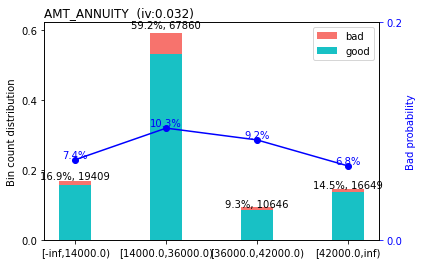

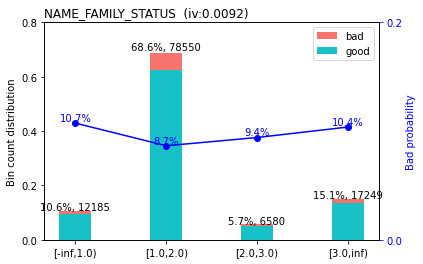

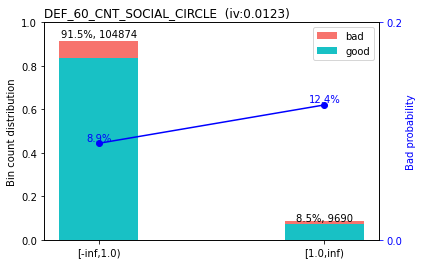

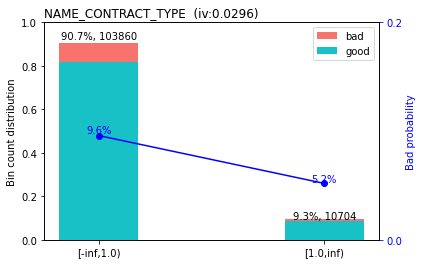

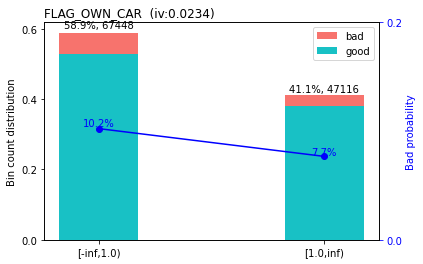

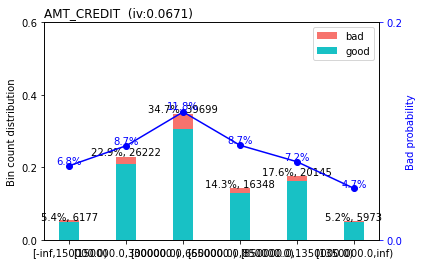

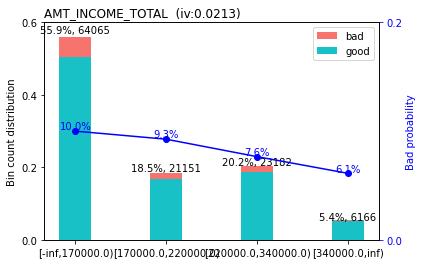

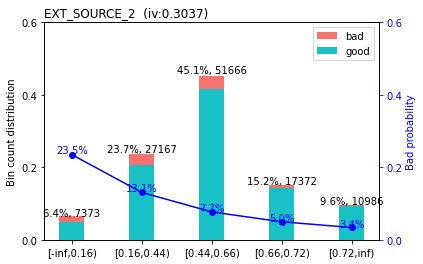

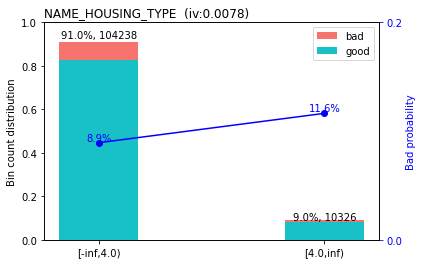

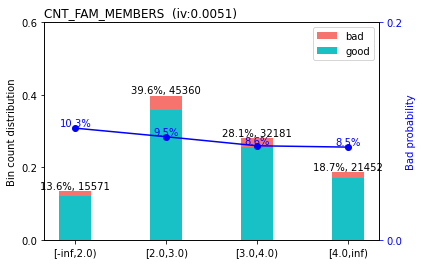

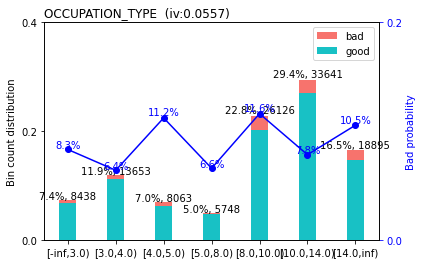

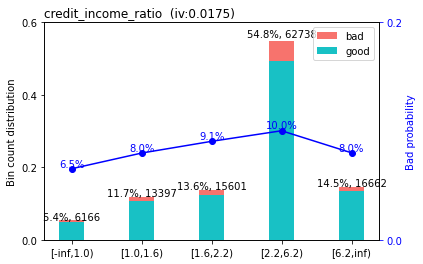

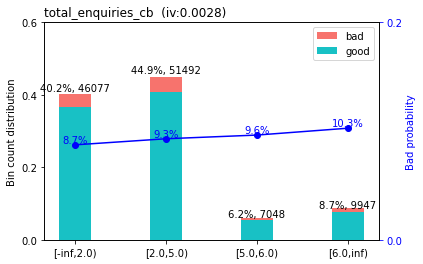

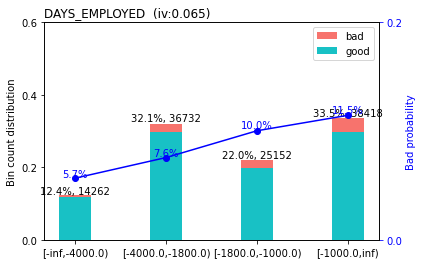

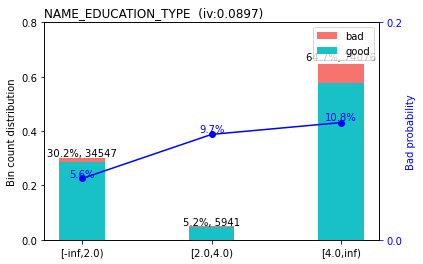

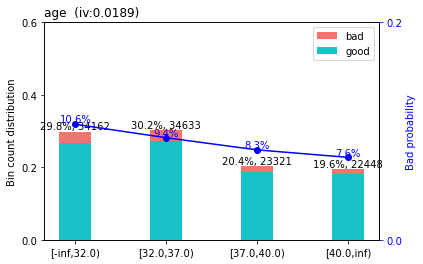

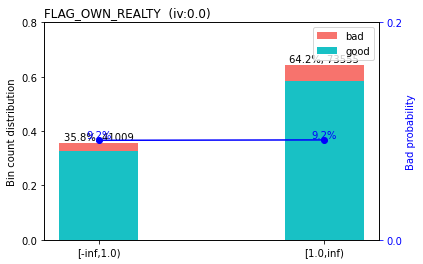

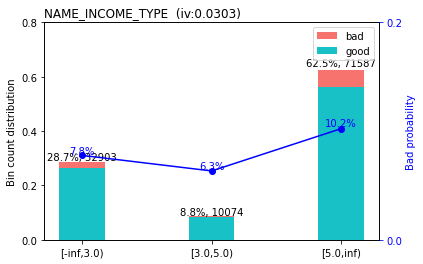

In [686]:
# plot the bins
sc.woebin_plot(bins)

In [687]:
#drop credit_income_ratio
df.drop("credit_income_ratio",axis=1,inplace=True)
df.drop("total_enquiries_cb",axis=1,inplace=True)

In [688]:
print(df.shape)
df.head()

(114564, 17)


,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age
0,1,0,1,1,171000.0,1560726.0,41301.0,1,1,1,1,-3130,0,3.0,0.724000,0.0,37.0
1,1,0,0,1,112500.0,652500.0,21177.0,5,1,1,1,-679,3,3.0,0.651862,0.0,27.0
2,1,0,0,1,67500.0,80865.0,5881.5,5,4,1,1,-2717,8,2.0,0.715042,0.0,36.0
3,1,0,1,0,225000.0,918468.0,28966.5,5,4,1,1,-3028,4,3.0,0.566907,0.0,38.0
4,1,0,0,0,108000.0,509602.5,26149.5,5,4,1,1,-1317,4,2.0,0.236378,0.0,35.0


In [689]:
df.drop("FLAG_OWN_REALTY",axis=1,inplace=True)
df.drop("NAME_HOUSING_TYPE",axis=1,inplace=True)

In [690]:
print(df.shape)
df.head()

(114564, 15)


,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age
0,1,0,1,171000.0,1560726.0,41301.0,1,1,1,-3130,0,3.0,0.724000,0.0,37.0
1,1,0,0,112500.0,652500.0,21177.0,5,1,1,-679,3,3.0,0.651862,0.0,27.0
2,1,0,0,67500.0,80865.0,5881.5,5,4,1,-2717,8,2.0,0.715042,0.0,36.0
3,1,0,1,225000.0,918468.0,28966.5,5,4,1,-3028,4,3.0,0.566907,0.0,38.0
4,1,0,0,108000.0,509602.5,26149.5,5,4,1,-1317,4,2.0,0.236378,0.0,35.0


# Adjust Occupation Type

In [691]:
df["OCCUPATION_TYPE"].value_counts().sort_index()

0      4800
1      1179
2      2459
3     13653
4      8063
5       279
6      5159
7       310
8     25203
9       923
10     9875
11     3583
12    18883
13     1300
14      402
15    15099
16      651
17     2157
18      586
Name: OCCUPATION_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'OCCUPATION_TYPE': <Figure size 432x288 with 2 Axes>}

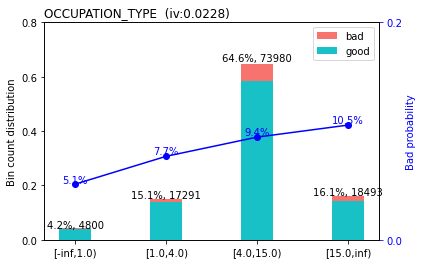

In [692]:
#adjust the bins
breaks_adj = {'OCCUPATION_TYPE' : [1, 4, 15]}
bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins2['OCCUPATION_TYPE'])

# Adjust income type

In [693]:
df["NAME_INCOME_TYPE"].value_counts().sort_index()

0        1
1    32204
2      698
3    10068
4        6
5    71587
Name: NAME_INCOME_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:13


{'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>}

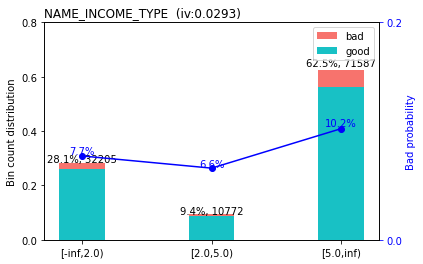

In [694]:
#adjust the bins
breaks_adj = {'NAME_INCOME_TYPE' : [0,2,5]}
bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins3['NAME_INCOME_TYPE'])

# Adjust name education type

In [695]:
df["NAME_EDUCATION_TYPE"].value_counts().sort_index()

0       64
1    34483
2     4757
3     1184
4    74076
Name: NAME_EDUCATION_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'NAME_EDUCATION_TYPE': <Figure size 432x288 with 2 Axes>}

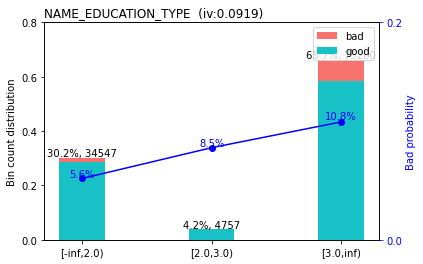

In [696]:
#adjust the bins
breaks_adj = {'NAME_EDUCATION_TYPE' : [0,2,3]}
bins4 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins4 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins4['NAME_EDUCATION_TYPE'])

# Adjust amt income total

In [697]:
df["AMT_INCOME_TOTAL"].value_counts().sort_index()

26550.0         1
27000.0        15
27900.0         2
28723.5         1
29250.0         4
               ..
3375000.0       1
3600000.0       2
3950059.5       1
4500000.0       1
117000000.0     1
Name: AMT_INCOME_TOTAL, Length: 1172, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:11


{'AMT_INCOME_TOTAL': <Figure size 432x288 with 2 Axes>}

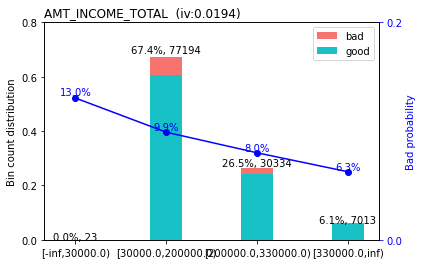

In [698]:
#adjust the bins
breaks_adj = {'AMT_INCOME_TOTAL' : [0,30000, 200000, 330000]}
bins5 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins5 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins5['AMT_INCOME_TOTAL'])

# Adjust days employed

In [699]:
df["DAYS_EMPLOYED"].value_counts().sort_index()

-9136        1
-9123        1
-9112        1
-9100        1
-9039        1
          ... 
-8           1
-5           1
-4           2
 0           2
 365243    697
Name: DAYS_EMPLOYED, Length: 7976, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'DAYS_EMPLOYED': <Figure size 432x288 with 2 Axes>}

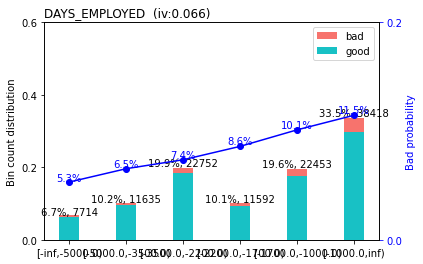

In [700]:
#adjust the bins
breaks_adj = {'DAYS_EMPLOYED' : [-5000,-3500, -2200, -1700, -1000]}
bins6 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins6 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins6['DAYS_EMPLOYED'])

# Adjust amt annuity

In [701]:
df["AMT_ANNUITY"].value_counts().sort_index()

0.0          5
2187.0       1
2205.0       1
2754.0       1
2781.0       2
            ..
213291.0     3
215500.5     1
220297.5     1
225000.0    10
258025.5     1
Name: AMT_ANNUITY, Length: 10881, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'AMT_ANNUITY': <Figure size 432x288 with 2 Axes>}

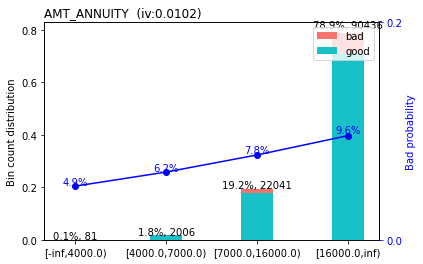

In [702]:
#adjust the bins
breaks_adj = {'AMT_ANNUITY' : [4000, 7000, 16000]}
bins7 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins7 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins7['AMT_ANNUITY'])

# Adjust ext source 2

In [703]:
df["EXT_SOURCE_2"].value_counts().sort_index()

0.000001    1
0.000006    1
0.000010    1
0.000017    1
0.000017    1
           ..
0.816462    1
0.816504    1
0.817873    1
0.821714    1
0.855000    9
Name: EXT_SOURCE_2, Length: 72580, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:11


{'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>}

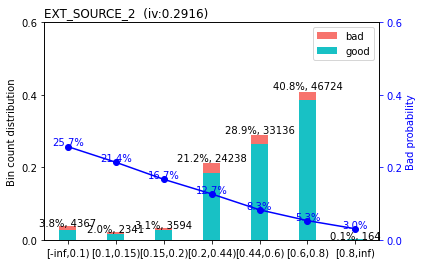

In [704]:
#adjust the bins
breaks_adj = {'EXT_SOURCE_2' : [0.1,0.15,0.20,0.44,0.6,0.80]}
bins8 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins8 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins8['EXT_SOURCE_2'])

In [705]:
df["AMT_CREDIT"].value_counts().sort_index()

45000.0      79
47970.0      60
48519.0       1
49455.0       4
49500.0      15
             ..
3312162.0     1
3375000.0     3
3600000.0     2
3860019.0     1
4050000.0     5
Name: AMT_CREDIT, Length: 4124, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:11


{'AMT_CREDIT': <Figure size 432x288 with 2 Axes>}

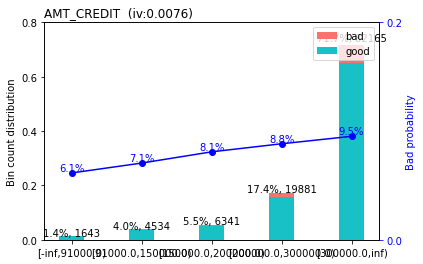

In [706]:
#adjust the bins
breaks_adj = {'AMT_CREDIT' : [91000,150000,200000,300000]}
bins9 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins9 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins9['AMT_CREDIT'])

In [707]:
df["CNT_FAM_MEMBERS"].value_counts().sort_index()

1.0     15571
2.0     45360
3.0     32181
4.0     18466
5.0      2639
6.0       270
7.0        54
8.0        11
9.0         2
10.0        3
11.0        1
12.0        1
14.0        2
16.0        1
20.0        2
Name: CNT_FAM_MEMBERS, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'CNT_FAM_MEMBERS': <Figure size 432x288 with 2 Axes>}

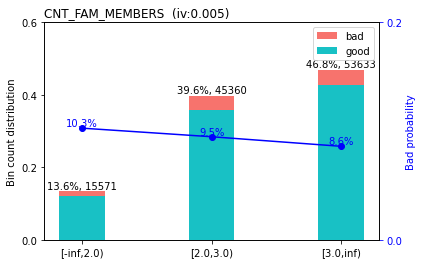

In [708]:
#adjust the bins
breaks_adj = {'CNT_FAM_MEMBERS' : [1,2,3]}
bins10 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins10 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins10['CNT_FAM_MEMBERS'])

In [709]:
df["NAME_FAMILY_STATUS"].value_counts().sort_index()

0    12185
1    78550
2     6580
3    16340
4      909
Name: NAME_FAMILY_STATUS, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'NAME_FAMILY_STATUS': <Figure size 432x288 with 2 Axes>}

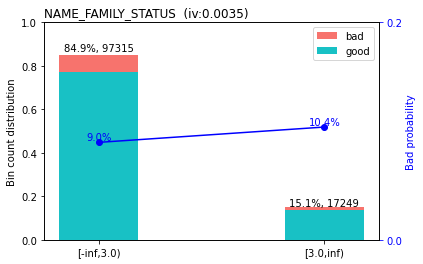

In [710]:
#adjust the bins
breaks_adj = {'NAME_FAMILY_STATUS' : [0,3]}
bins11 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins11 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins11['NAME_FAMILY_STATUS'])

In [711]:
df["age"].value_counts().sort_index()

27.0    7061
28.0    6700
29.0    6491
30.0    6636
31.0    7274
32.0    6833
33.0    6789
34.0    6675
35.0    6824
36.0    7512
37.0    7779
38.0    7860
39.0    7682
40.0    7677
41.0    7500
42.0    7271
Name: age, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:13


{'age': <Figure size 432x288 with 2 Axes>}

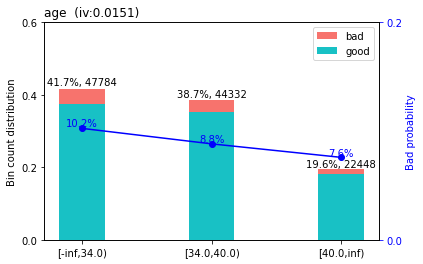

In [712]:
#adjust the bins
breaks_adj = {'age' : [27, 34, 40]}
bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins12['age'])

In [713]:
df["NAME_CONTRACT_TYPE"].value_counts().sort_index()

0    103860
1     10704
Name: NAME_CONTRACT_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:11


{'NAME_CONTRACT_TYPE': <Figure size 432x288 with 2 Axes>}

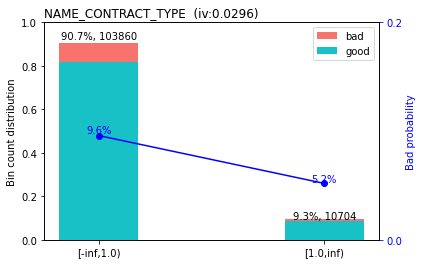

In [714]:
#adjust the bins
breaks_adj = {'NAME_CONTRACT_TYPE' : [0,1]}
bins13 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins13 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins13['NAME_CONTRACT_TYPE'])

In [715]:
df["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().sort_index()

0.0     104874
1.0       8268
2.0       1154
3.0        222
4.0         39
5.0          5
6.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:12


{'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>}

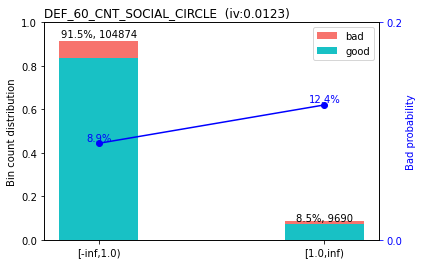

In [716]:
#adjust the bins
breaks_adj = {'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1]}
bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins14['DEF_60_CNT_SOCIAL_CIRCLE'])

In [717]:
df["FLAG_OWN_CAR"].value_counts().sort_index()

0    67448
1    47116
Name: FLAG_OWN_CAR, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:13


{'FLAG_OWN_CAR': <Figure size 432x288 with 2 Axes>}

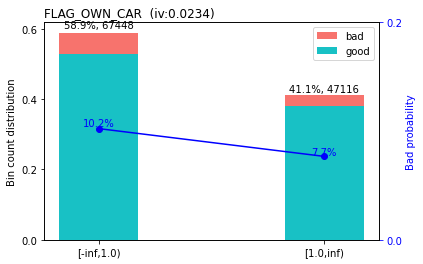

In [718]:
#adjust the bins
breaks_adj = {'FLAG_OWN_CAR' : [0,1]}
bins15 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# bins15 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins15['FLAG_OWN_CAR'])

In [796]:
breaks_adj = {
       'OCCUPATION_TYPE' : [1, 4, 15],
       'NAME_INCOME_TYPE' : [0,2,5],
        'NAME_EDUCATION_TYPE' : [0,2,3],
        'AMT_INCOME_TOTAL' : [0,30000, 200000, 330000],
        'DAYS_EMPLOYED' : [-5000,-3500, -2200, -1700, -1000],
        'AMT_ANNUITY' : [4000, 7000, 16000],
        'EXT_SOURCE_2' : [0.1,0.15,0.20,0.44,0.6,0.80],
        'AMT_CREDIT' : [91000,150000,200000,300000],
        'CNT_FAM_MEMBERS' : [1,2,3],
    'NAME_FAMILY_STATUS' : [0,3],
        'age' : [27,34,40],
        'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1],
        'FLAG_OWN_CAR': [0,1]
        
    }
bins_final = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")

[INFO] creating woe binning ...


In [797]:
# sample code
train, test = sc.split_df(df, 'STATUS', ratio=0.8).values()
print(train.shape)
print(test.shape)

(91651, 15)
(22913, 15)


In [798]:
print('Proportion of positive cases in train set:', train['STATUS'].mean())
print('Proportion of positive cases in test set:', test['STATUS'].mean())

Proportion of positive cases in train set: 0.9082497735976695
Proportion of positive cases in test set: 0.9082616855060446


In [801]:
train_woe = sc.woebin_ply(train, bins_final)
test_woe = sc.woebin_ply(test, bins_final)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [802]:
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,test_woe.columns != 'STATUS']

In [803]:
#create a logistic regression model object
lr = LogisticRegression(class_weight='balanced', random_state=7)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[-0.40454267 -0.08231904 -0.8634496  -0.77774177 -0.74817737 -0.85806843
  -1.16376288 -0.12020593 -0.89200911 -0.70434699 -0.86274736 -0.61799204
  -0.48944096 -0.59820361]]
[0.00395877]


1 is good
0 is default

In [804]:
accuracy = lr.score(X_test, y_test)
accuracy

0.6493693536420373

In [805]:
y_test.value_counts()

1    20811
0     2102
Name: STATUS, dtype: int64

In [810]:
# make predictions on the test set
y_pred = lr.predict(X_test)

In [813]:
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

# create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=['Good', 'Default'], columns=['Predict Good', 'Predict Default'])


# print the dataframe
print(df_cm)

         Predict Good  Predict Default
Good            13573             7238
Default           796             1306


True positive (TP)
The model predicts a good customer, and the client did not default <br>
False positive (FP)
The model predicts a good customer, but the client defaulted<br>
True negative (TN) 
The model predicts a default, and the client defaulted<br>
False negative (FN)
The model predicts a default, but the client did not default

In [815]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
print(tp,fn,fp,tn)

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) #Given that we predict positive, how often is it really positive
recall = tp / (tp + fn) #How good at predicting positive
f1 = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp) # How good at predicting negative?

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity) 
print("F1:", f1)

13573 7238 796 1306
Accuracy: 0.6493693536420373
Precision: 0.9446029647157074
Recall: 0.6522031617894383
Specificity: 0.621313035204567
F1: 0.7716316088686754


In [820]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
def calculate(y_test,y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
    return tn/(tn+fp)

In [821]:
len(numbers)

199

In [823]:
numbers = []
for i in range(1, 200):
    numbers.append(i / 100)

best_c = 1
spec = 0.621313035204567

In [824]:
for i in numbers:
    lr = LogisticRegression(random_state=7,C= i, solver= 'liblinear', class_weight='balanced')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    res = calculate(y_test,y_pred)
    if res > spec:
        best_c=i
        spec=res

In [825]:
print(best_c)

0.42


In [826]:
#create a logistic regression model object
lr = LogisticRegression(C=0.42,class_weight='balanced', solver='liblinear', random_state=7)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[-0.41377222 -0.09159803 -0.85922562 -0.77533466 -0.74634404 -0.85728905
  -1.14586529 -0.11994587 -0.89184634 -0.70380379 -0.84790758 -0.61495019
  -0.48812632 -0.59668339]]
[0.00398674]


In [828]:
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

# create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=['Good', 'Default'], columns=['Predict Good', 'Predict Default'])


# print the dataframe
print(df_cm)

         Predict Good  Predict Default
Good            13572             7239
Default           796             1306


In [830]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
print(tp,fn,fp,tn)

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) #Given that we predict positive, how often is it really positive
recall = tp / (tp + fn) #How good at predicting positive
f1 = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp) # How good at predicting negative?

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity) 
print("F1:", f1)

13572 7239 796 1306
Accuracy: 0.6493257102954655
Precision: 0.9445991091314031
Recall: 0.6521551102782183
Specificity: 0.621313035204567
F1: 0.7715966912078228


In [831]:
X_train.columns

Index(['AMT_ANNUITY_woe', 'NAME_FAMILY_STATUS_woe',
       'DEF_60_CNT_SOCIAL_CIRCLE_woe', 'FLAG_OWN_CAR_woe',
       'NAME_CONTRACT_TYPE_woe', 'DAYS_EMPLOYED_woe', 'AMT_CREDIT_woe',
       'AMT_INCOME_TOTAL_woe', 'EXT_SOURCE_2_woe', 'NAME_EDUCATION_TYPE_woe',
       'CNT_FAM_MEMBERS_woe', 'age_woe', 'OCCUPATION_TYPE_woe',
       'NAME_INCOME_TYPE_woe'],
      dtype='object')

In [832]:
#generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(bins_final, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_ANNUITY':       variable               bin  points
0  AMT_ANNUITY     [-inf,4000.0)    29.0
1  AMT_ANNUITY   [4000.0,7000.0)    32.0
2  AMT_ANNUITY  [7000.0,16000.0)    35.0
3  AMT_ANNUITY     [16000.0,inf)    37.0,
 'AMT_CREDIT':       variable                  bin  points
18  AMT_CREDIT       [-inf,91000.0)    22.0
19  AMT_CREDIT   [91000.0,150000.0)    27.0
20  AMT_CREDIT  [150000.0,200000.0)    32.0
21  AMT_CREDIT  [200000.0,300000.0)    35.0
22  AMT_CREDIT       [300000.0,inf)    38.0,
 'AMT_INCOME_TOTAL':             variable                  bin  points
23  AMT_INCOME_TOTAL       [-inf,30000.0)    38.0
24  AMT_INCOME_TOTAL   [30000.0,200000.0)    37.0
25  AMT_INCOME_TOTAL  [200000.0,330000.0)    36.0
26  AMT_INCOME_TOTAL       [330000.0,inf)    35.0,
 'CNT_FAM_MEMBERS':            variable         bin  points
37  CNT_FAM_MEMBERS  [-inf,2.0)    40.0
38  CNT_FAM_MEMBERS   [2.0,3.0)    38.0
39  CNT_FAM_MEMBERS   [3.0,inf)    35.0,
 'DAYS_EMPLOYED':          variable          

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

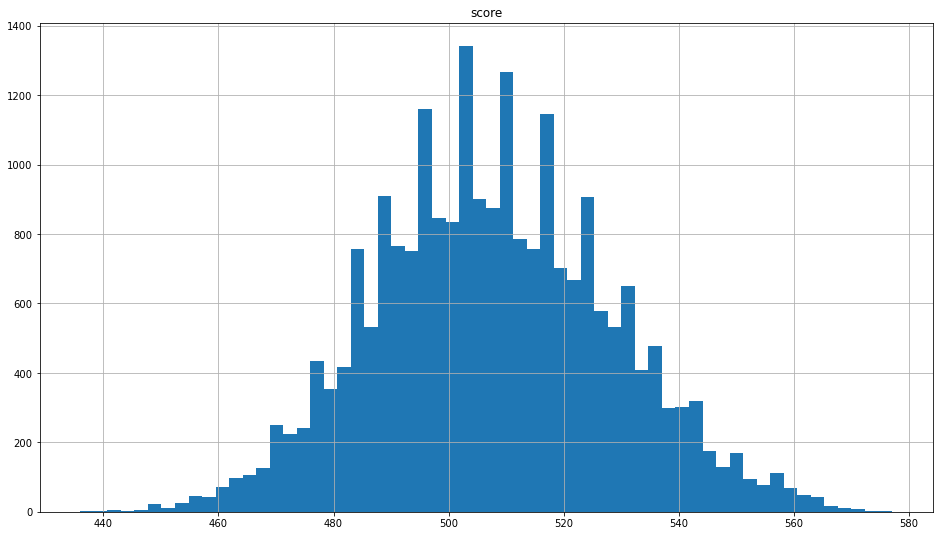

In [833]:
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
test_score.hist(figsize=(16,9),bins=60)

Please don't clear the codes behind. Incase we need later on

In [834]:
# scorecards = {}
# for i in range(len(bins_list)):
#     # Generate scorecard for each variable
#     card = sc.scorecard(bins_list[i], lr, X_train.columns, points0=600, odds0=1/20, pdo=20, basepoints_eq0=True)
#     # Add scorecard to dictionary
#     scorecards[X_train.columns[i]] = card

In [835]:
# test_woe1 = sc.woebin_ply(test, bins_list[0])

In [836]:
# train_woe1.drop(train_woe1.columns[1:15], axis=1, inplace=True)
# train_woe1

In [837]:
# bins_list = [bins2,bins3,bins4,bins5,bins6,bins7,bins8,bins9,bins10,bins11,bins12,bins13,bins14, bins15]

In [838]:
# for i in range(len(bins_list)):
#     print(i)

In [839]:
# train_woe1 = sc.woebin_ply(train, bins_list[0])
# test_woe1 = sc.woebin_ply(test, bins_list[0])
# for i in range(len(bins_list)):
#     train_woe = sc.woebin_ply(train, bins_list[i])
#     test_woe = sc.woebin_ply(test, bins_list[i])
#     if i==0:
#         train_woe1['OCCUPATION_TYPE_woe_encoded']=train_woe['OCCUPATION_TYPE_woe']
#         test_woe1['OCCUPATION_TYPE_woe_encoded']=test_woe['OCCUPATION_TYPE_woe']
#     if i==1:
#         train_woe1['NAME_INCOME_TYPE_woe_encoded']=train_woe['NAME_INCOME_TYPE_woe']  
#         test_woe1['NAME_INCOME_TYPE_woe_encoded']=test_woe['NAME_INCOME_TYPE_woe']
#     if i==2:
#         train_woe1['NAME_EDUCATION_TYPE_woe_encoded']=train_woe['NAME_EDUCATION_TYPE_woe']   
#         test_woe1['NAME_EDUCATION_TYPE_woe_encoded']=test_woe['NAME_EDUCATION_TYPE_woe']
#     if i==3:
#         train_woe1['AMT_INCOME_TOTAL_woe_encoded']=train_woe['AMT_INCOME_TOTAL_woe'] 
#         test_woe1['AMT_INCOME_TOTAL_woe_encoded']=test_woe['AMT_INCOME_TOTAL_woe']
#     if i==4:
#         train_woe1['DAYS_EMPLOYED_woe_encoded']=train_woe['DAYS_EMPLOYED_woe']    
#         test_woe1['DAYS_EMPLOYED_woe_encoded']=test_woe['DAYS_EMPLOYED_woe']
#     if i==5:  
#         train_woe1['AMT_ANNUITY_woe_encoded']=train_woe['AMT_ANNUITY_woe'] 
#         test_woe1['AMT_ANNUITY_woe_encoded']=test_woe['AMT_ANNUITY_woe']
#     if i==6:
#         train_woe1['EXT_SOURCE_2_woe_encoded']=train_woe['EXT_SOURCE_2_woe']           
#         test_woe1['EXT_SOURCE_2_woe_encoded']=test_woe['EXT_SOURCE_2_woe']     
#     if i==7:
#         train_woe1['AMT_CREDIT_woe_encoded']=train_woe['AMT_CREDIT_woe']        
#         test_woe1['AMT_CREDIT_woe_encoded']=test_woe['AMT_CREDIT_woe']  
#     if i==8:
#         train_woe1['CNT_FAM_MEMBERS_woe_encoded']=train_woe['CNT_FAM_MEMBERS_woe']       #10
#         test_woe1['CNT_FAM_MEMBERS_woe_encoded']=test_woe['CNT_FAM_MEMBERS_woe']       #10
#     if i==9:
#         train_woe1['NAME_FAMILY_STATUS_woe_encoded']=train_woe['NAME_FAMILY_STATUS_woe']     #11    
#         test_woe1['NAME_FAMILY_STATUS_woe_encoded']=test_woe['NAME_FAMILY_STATUS_woe']     #11    
#     if i==10: 
#         train_woe1['age_woe_encoded']=train_woe['age_woe']      #12   
#         test_woe1['age_woe_encoded']=test_woe['age_woe']      #12   
#     if i==11:
#         train_woe1['NAME_CONTRACT_TYPE_woe_encoded']=train_woe['NAME_CONTRACT_TYPE_woe']      #13
#         test_woe1['NAME_CONTRACT_TYPE_woe_encoded']=test_woe['NAME_CONTRACT_TYPE_woe']      #13
#     if i==12:
#         train_woe1['DEF_60_CNT_SOCIAL_CIRCLE_woe_encoded']=train_woe['DEF_60_CNT_SOCIAL_CIRCLE_woe']      #14
#         test_woe1['DEF_60_CNT_SOCIAL_CIRCLE_woe_encoded']=test_woe['DEF_60_CNT_SOCIAL_CIRCLE_woe']      #14
#     if i==13:
#         train_woe1['FLAG_OWN_CAR_woe_encoded']=train_woe['FLAG_OWN_CAR_woe']      #15
#         test_woe1['FLAG_OWN_CAR_woe_encoded']=test_woe['FLAG_OWN_CAR_woe']      #15

In [840]:
# train_woe1.drop(train_woe1.columns[1:15], axis=1, inplace=True)
# train_woe1

In [758]:
# test_woe1.drop(test_woe1.columns[1:15], axis=1, inplace=True)

In [841]:
# # Define the desired column order
# new_order = ['AMT_ANNUITY_woe_encoded', 'NAME_FAMILY_STATUS_woe_encoded', 'DEF_60_CNT_SOCIAL_CIRCLE_woe_encoded',
#               'FLAG_OWN_CAR_woe_encoded','NAME_CONTRACT_TYPE_woe_encoded','DAYS_EMPLOYED_woe_encoded', 'AMT_CREDIT_woe_encoded',
#               'AMT_INCOME_TOTAL_woe_encoded','EXT_SOURCE_2_woe_encoded','NAME_EDUCATION_TYPE_woe_encoded','CNT_FAM_MEMBERS_woe_encoded','age_woe_encoded'
#               ,'OCCUPATION_TYPE_woe_encoded','NAME_INCOME_TYPE_woe_encoded','STATUS']

# train_woe1 = train_woe1.reindex(columns=new_order)
# test_woe1 = test_woe1.reindex(columns=new_order)

In [842]:
# train_woe1

In [843]:
# test_woe1